In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
bank = pd.read_csv("bank-full.csv")
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,3,0,3,0,2143,1,0,0,5,5,261,1,-1,0,0,0
1,44,10,2,1,0,29,1,0,0,5,5,151,1,-1,0,0,0
2,33,5,0,1,0,2,1,1,0,5,5,76,1,-1,0,0,0
3,47,7,0,0,0,1506,1,0,0,5,5,92,1,-1,0,0,0
4,33,1,2,0,0,1,0,0,0,5,5,198,1,-1,0,0,0


In [3]:
bank.shape

(45211, 17)

In [4]:
bank=bank.dropna()
bank.shape

(45211, 17)

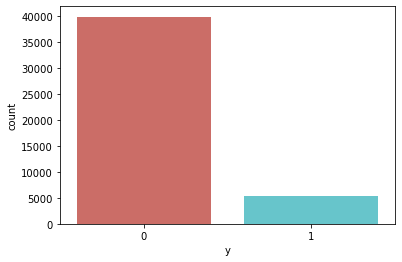

In [5]:
sns.countplot(x='y' ,data=bank, palette='hls')
plt.show()

In [6]:
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

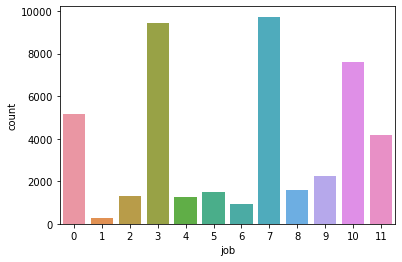

In [7]:
sns.countplot(x="job", data=bank)
plt.show()

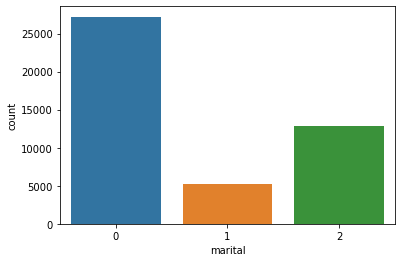

In [8]:
sns.countplot(x="marital", data=bank)
plt.show()

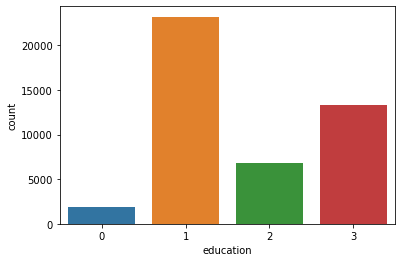

In [9]:
sns.countplot(x="education", data=bank)
plt.show()

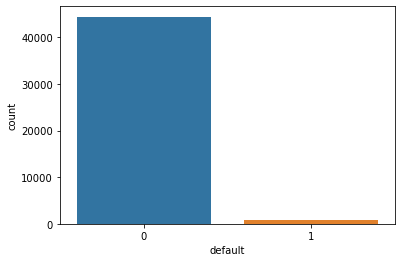

In [10]:
sns.countplot(x="default", data=bank)
plt.show()

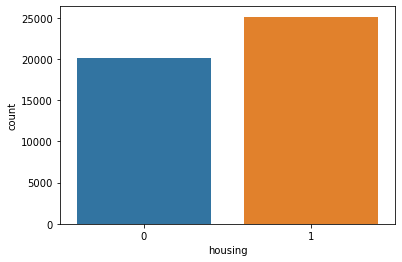

In [11]:
sns.countplot(x="housing", data=bank)
plt.show()

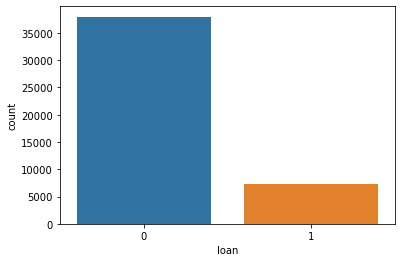

In [12]:
sns.countplot(x="loan", data=bank)
plt.show()

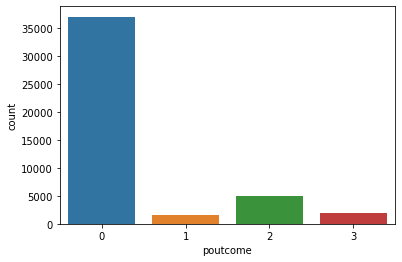

In [13]:
sns.countplot(x="poutcome", data=bank)
plt.show()

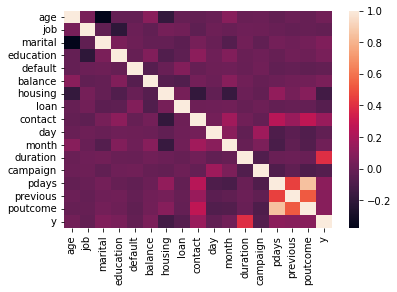

In [14]:
sns.heatmap(bank.corr())
plt.show()

In [15]:
# Dividing our data into input and output variables 
X = bank.iloc[:,:16]
Y = bank.iloc[:,16]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=0)

In [16]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

In [17]:
#Logistic regression and fit the model
classifier = LogisticRegression()
classifier.fit(X_train,y_train)

C:\Users\uniha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [18]:
#Predict for X dataset
y_pred = classifier.predict(X_test)

In [19]:
y_pred_df= pd.DataFrame({'actual': Y, 'predicted_prob': classifier.predict(X)})

In [20]:
y_pred_df

,actual,predicted_prob
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,0
45207,1,0
45208,1,0
45209,0,0


In [21]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred)
print (confusion_matrix)

[[15658   299]
 [ 1775   353]]


In [22]:
((39295+799)/(39295+627+4490+799))*100

88.68195793059212

In [23]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     15957
           1       0.54      0.17      0.25      2128

    accuracy                           0.89     18085
   macro avg       0.72      0.57      0.60     18085
weighted avg       0.86      0.89      0.86     18085



In [24]:
y_pred = classifier.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classifier.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.89


In [25]:
model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)

C:\Users\uniha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

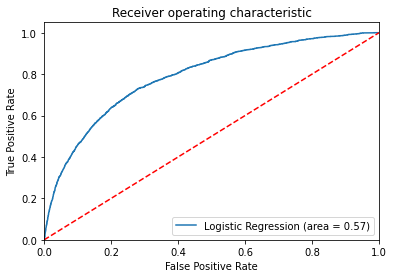

In [26]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()